In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.preprocessing import text, sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Activation, Dropout, Dense
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
train_df = pd.read_csv('data/train_data.csv')
train_df.head()

,content,sentiment
0,It is so annoying when she starts typing on he...,angry
1,dammit! hulu desktop has totally screwed up my...,angry
2,@ cayogial i wanted to come to BZ this summer ...,angry
3,@mrgenius23 You win ... SIGH Rakeem,angry
4,"@soviet_star Damn, that sucks",angry


In [3]:
train_df = train_df.dropna()

In [4]:
train_df.tail()

,content,sentiment
45205,singing songs and filming movies what i do best,worry
45206,Hehe nah just doing this and watching Ace of C...,worry
45207,Speaking to my new tweeples.... getting acquai...,worry
45208,"Excellent, excellent movie! Star Trek, that is.",worry
45209,"@MeganWrappe Well, guess we just make a pretty...",worry


In [5]:
print(len(train_df))
print(type(train_df))
print(train_df.ndim)
print(train_df.shape)
print(train_df.dtypes)
print(train_df.size)

45206
<class 'pandas.core.frame.DataFrame'>
2
(45206, 2)
content      object
sentiment    object
dtype: object
90412


In [6]:
train_df['sentiment'].value_counts()

sad           10290
worry          7432
happy          7229
angry          6789
neutral        6339
love           2068
surprise       1613
fun            1088
relief         1021
empty           658
enthusiasm      522
boredom         157
Name: sentiment, dtype: int64

In [7]:
train_df = train_df.drop(train_df[(train_df['sentiment']== "worry") | (train_df['sentiment']== "empty") | (train_df['sentiment']== "enthusiasm") | (train_df['sentiment']== "boredom")].index)
train_df['sentiment'].value_counts()

sad         10290
happy        7229
angry        6789
neutral      6339
love         2068
surprise     1613
fun          1088
relief       1021
Name: sentiment, dtype: int64

In [8]:
train_df['sentiment'].value_counts() / len(train_df)

sad         0.282405
happy       0.198397
angry       0.186322
neutral     0.173972
love        0.056755
surprise    0.044268
fun         0.029860
relief      0.028021
Name: sentiment, dtype: float64

In [9]:
(train_df['sentiment'].value_counts() / len(train_df)).plot.bar()

There is very less 'fear' data, which is a critical emotion, so adding more of it.

In [13]:
train_df_1_fear = pd.read_csv('/kueen/NeMo/examples/applications/asr_service/app/emotion-classification/data/fear-ratings-0to1.test.gold.txt', error_bad_lines=False, sep='\t', header=None)
train_df_2_fear = pd.read_csv('/kueen/NeMo/examples/applications/asr_service/app/emotion-classification/data/fear-ratings-0to1.train.txt', error_bad_lines=False, sep='\t', header=None)
train_df_fear = [train_df_1_fear, train_df_2_fear]
train_df_fear = pd.concat(train_df_fear)
train_df_fear.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']
train_df_fear = train_df_fear[train_df_fear.sentiment_intensity > 0.5]
train_df_fear = train_df_fear.drop(['tweet_id', 'sentiment_intensity'], axis=1)
train_df_fear.tail()

,content,sentiment
523,@Budget car rental you have made realize why ...,fear
524,@Delta stuck on runway after being diverted to...,fear
525,Caballero's passing remains absolutely dreadfu...,fear
526,Why is it when you nap during the day you are ...,fear
527,"Maybe I'm too cynical for my own good, but I'm...",fear


sad         10290
happy        7229
angry        6789
neutral      6339
love         2068
surprise     1613
fun          1088
relief       1021
fear         1000
Name: sentiment, dtype: int64


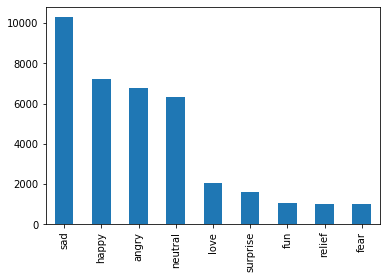

In [14]:
train_df = [train_df, train_df_fear]
train_df = pd.concat(train_df)
print(train_df['sentiment'].value_counts())
train_df['sentiment'].value_counts().plot.bar()

In [15]:
np.where(pd.isnull(train_df))

(array([], dtype=int64), array([], dtype=int64))

In [16]:
import numpy as np
classes = np.array(['angry', 'fear', 'fun', 'happy', 'love', 'neutral', 'relief', 'sad', 'surprise'],
      dtype='<U10')
np.save("new_classes.npy", classes)
np.load("new_classes.npy")

array(['angry', 'fear', 'fun', 'happy', 'love', 'neutral', 'relief',
       'sad', 'surprise'], dtype='<U10')

In [17]:
print(train_df.head())
train_df = train_df.sample(frac=1).reset_index(drop=True)
print(len(train_df))
train_df.head()

                                             content sentiment
0  It is so annoying when she starts typing on he...     angry
1  dammit! hulu desktop has totally screwed up my...     angry
2  @ cayogial i wanted to come to BZ this summer ...     angry
3                @mrgenius23 You win ... SIGH Rakeem     angry
4                      @soviet_star Damn, that sucks     angry
37437


,content,sentiment
0,"Yeah, why don't you insult me some more? do...",angry
1,@amor8 tell me what you think of Pride Prejudi...,neutral
2,Amazing ! Your name is amazing 😽 Awww th...,happy
3,so bored. nothing to do,neutral
4,Finally started Twittering.... got to keep up....,happy


In [18]:
y_pandas_df = pd.get_dummies(train_df['sentiment'])
print(type(y_pandas_df))
print(y_pandas_df.shape)
print(y_pandas_df.ndim)
y_pandas_df.head()

<class 'pandas.core.frame.DataFrame'>
(37437, 9)
2


,angry,fear,fun,happy,love,neutral,relief,sad,surprise
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0


In [19]:
y = y_pandas_df.values
print("properties of y")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(y), y.ndim, y.shape, y.size, y.dtype, y.itemsize))

properties of y
type : <class 'numpy.ndarray'>, dimensions : 2, shape : (37437, 9), total no. of elements : 336933, data type of each element: uint8, size of each element 1 bytes


In [20]:
train_df.shape

(37437, 2)

In [21]:
train_df = train_df.drop(['sentiment'], axis=1)

In [22]:
train_df.shape
x = train_df.values.flatten()

In [23]:
print(x)
print("properties of x")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x), x.ndim, x.shape, x.size, x.dtype, x.itemsize))

["Yeah, why don't you insult me some more?    don't see how that was an insult    Oh ok, so basically telling me to kill myself, is not an insult, than what is it?"
 "@amor8 tell me what you think of Pride Prejudice and Zombies . . . if you're not all hyped up on sugar"
 'Amazing !    Your name is amazing 😽    Awww thank you' ...
 "Thankyouuuu bae    you welcome but what's wrong?    Having headache and pain"
 'The case for my iPod Touch is literally falling apart.  So junk'
 '@cyan1234 I gotta leave early again, like 7:20']
properties of x
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (37437,), total no. of elements : 37437, data type of each element: object, size of each element 8 bytes


In [24]:
list_of_classes = ['angry', 'fear', 'fun', 'happy', 'love', 'neutral', 'relief', 'sad', 'surprise']
max_features = 20000
max_text_length = 400
embedding_dims = 50
batch_size = 32
epochs = 5
num_filters_1 = 250
num_filters_2 = 250
filter_size = 3

In [25]:
x_tokenizer = text.Tokenizer(num_words=max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [28]:
import pickle
with open('new_tokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=max_text_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters=num_filters_1, kernel_size=filter_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_filters_2))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(9))
model.add(Activation('sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           1000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250)               0         
__________

In [34]:
model.fit(x_train_val, y, batch_size=batch_size, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
37437/37437 [==============================] - 22s 598us/sample - loss: 0.2442 - acc: 0.9127
Epoch 2/5
37437/37437 [==============================] - 13s 348us/sample - loss: 0.1927 - acc: 0.9293
Epoch 3/5
37437/37437 [==============================] - 13s 345us/sample - loss: 0.1653 - acc: 0.9399
Epoch 4/5
37437/37437 [==============================] - 13s 340us/sample - loss: 0.1405 - acc: 0.9493
Epoch 5/5
37437/37437 [==============================] - 13s 346us/sample - loss: 0.1187 - acc: 0.9574


In [35]:
model.save('new_model.h5')